# A Primer on Linear Regressions

We shall use `numpy` to generate some synthetic data following a linear behavior and then fit a model to this set of points. Then we will plot points and fit using `matplotlib`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def generate_linear_data(num_points, coefficient, noise_std, seed):
    # Fix the random seed for reproducibility
    if seed is not None:
        np.random.seed(seed)
    # Generate random X values using a normal distribution centered at 3 with std 5
    X = np.random.normal(3, 5, num_points)
    # Generate noiseless y values
    y_noiseless = coefficient * X
    # Add Gaussian noise
    noise = np.random.normal(0, noise_std, num_points)
    y = y_noiseless + noise

    return X, y, y_noiseless

In [ ]:
# Parameters
coefficient = 2.0  # Slope of the line
num_points = 100  # Number of data points
noise_std = 3.0  # Standard deviation of the Gaussian noise
seed = 42  # Random seed for reproducibility

In [ ]:
X, y, y_noiseless = generate_linear_data(num_points, coefficient, noise_std, seed)

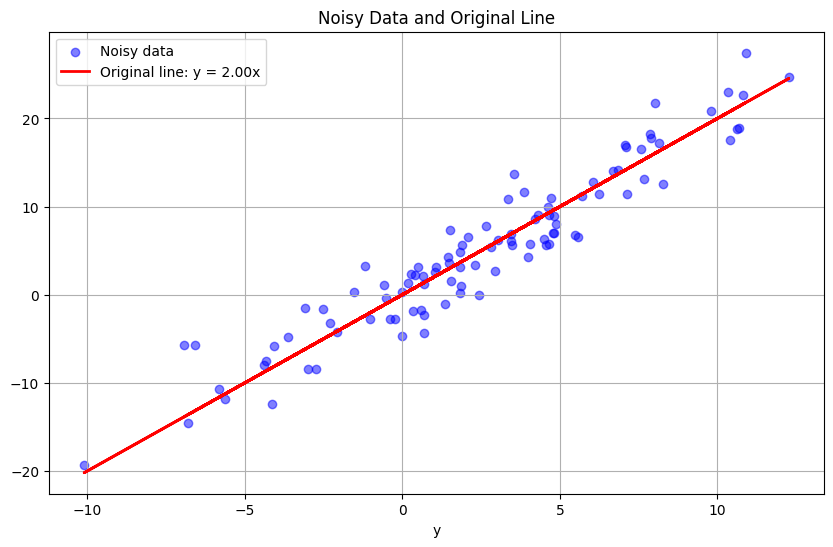

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Noisy data', color='blue', alpha=0.5)
plt.plot(X, y_noiseless, label=f'Original line: y = {coefficient:.2f}x', color='red', linewidth=2)
plt.xlabel('x')
plt.xlabel('y')
plt.title('Noisy Data and Original Line')
plt.legend()
plt.grid(True)
plt.show()

## Implementing the Closed-Form Solution

The closed-form solution for the least squares regression is given by the weights:

$ \mathbf{w} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y} $

where $\mathbf{X}$ is the matrix of input features (including a column of ones for the intercept), and $\mathbf{y}$ is the vector of output values.

You can use `np.linalg.inv` for inverting matrices and `@` for matrix multiplications.

Devi scrivere il codice che, dati i punti blu rumorosi del grafico originale, trovi la retta verde che meglio si adatta a questi punti, usando la formula matematica precisa.

Il tuo obiettivo è recuperare la retta rossa originale (y = 2x) partendo dai dati blu rumorosi!

In [ ]:
X_matrix = np.column_stack([np.ones(len(X)), X])
print("Shape di X_matrix:", X_matrix.shape)
print("Prime 5 righe di X_matrix:")
print(X_matrix[:5])

Shape di X_matrix: (100, 2)
Prime 5 righe di X_matrix:
[[ 1.          5.48357077]
 [ 1.          2.30867849]
 [ 1.          6.23844269]
 [ 1.         10.61514928]
 [ 1.          1.82923313]]


In [ ]:
# Calcola X trasposta
X_transpose = X_matrix.T

# Calcola XᵀX
X_transpose_X = np.dot(X_transpose, X_matrix)

# Calcola l'inversa di (XᵀX)
X_transpose_X_inv = np.linalg.inv(X_transpose_X)

# Calcola X trasposta per y
X_transpose_y = np.dot(X_transpose, y)

# Applica la formula completa
weights = np.dot(X_transpose_X_inv, X_transpose_y)

# Estrai intercetta e pendenza
intercept, slope = weights
print("Intercetta (w0):", intercept)
print("Pendenza (w1):", slope)


print(f"Intercetta (w0): {intercept:.4f}")
print(f"Pendenza (w1): {slope:.4f}")
print(f"Pendenza originale: {coefficient:.4f}")


y_pred = np.dot(X_matrix, weights)


Intercetta (w0): 0.28014637808050713
Pendenza (w1): 1.9140457038371321
Intercetta (w0): 0.2801
Pendenza (w1): 1.9140
Pendenza originale: 2.0000


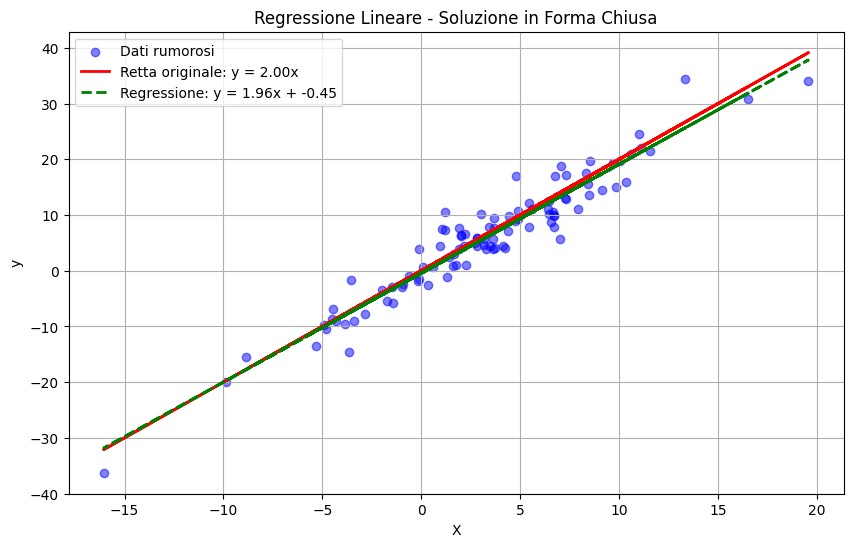

In [ ]:
#grafico con le nuove cose
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Dati rumorosi', color='blue', alpha=0.5)
plt.plot(X, y_noiseless, label=f'Retta originale: y = {coefficient:.2f}x',
         color='red', linewidth=2)
plt.plot(X, y_pred, label=f'Regressione: y = {slope:.2f}x + {intercept:.2f}',
         color='green', linewidth=2, linestyle='--')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regressione Lineare - Soluzione in Forma Chiusa')
plt.legend()
plt.grid(True)
plt.show()